# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Ragini Sinha

### Git hub: https://github.com/ragini-sinha03/article-summarizer
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
import requests
from bs4 import BeautifulSoup

# Correct link to the full HTML version of the book
url = "https://www.gutenberg.org/files/30775/30775-h/30775-h.htm"

# Request the page
response = requests.get(url)

# Check for success
if response.status_code == 200:
    # (Optional) parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Save HTML to a file named article.html
    with open('article.html', 'w', encoding='utf-8') as file:
        file.write(response.text)
    
    print("HTML content has been saved to 'article.html'")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


HTML content has been saved to 'article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [17]:
import spacy
from bs4 import BeautifulSoup

# Step 1: Read the saved HTML file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Extract text using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy and add the SpacyTextBlob component
nlp = spacy.load("en_core_web_sm")

if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Step 4: Analyze the text
doc = nlp(article_text)

# Step 5: Output polarity and sentence count
print("Sentiment Analysis of Article:")
print("-------------------------------")
print(f"Polarity Score       : {doc._.polarity:.3f}")
print(f"Subjectivity Score   : {doc._.subjectivity:.3f}")
print(f"Total Sentences Found: {len(list(doc.sents))}")


Sentiment Analysis of Article:
-------------------------------
Polarity Score       : 0.068
Subjectivity Score   : 0.446
Total Sentences Found: 4283


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [18]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Step 1: Read the saved HTML file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Extract text using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the article text
doc = nlp(article_text)

# Step 5: Extract tokens, convert to lowercase, filter out punctuation/whitespace
tokens = [token.text.lower() for token in doc if token.is_alpha]

# Step 6: Count token frequencies
token_freq = Counter(tokens)

# Step 7: Get 5 most common tokens and their frequencies
most_common = token_freq.most_common(5)

# Step 8: Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens:
Token: 'the', Frequency: 8452
Token: 'of', Frequency: 6461
Token: 'and', Frequency: 2861
Token: 'to', Frequency: 2531
Token: 'in', Frequency: 2525


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [19]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Step 1: Read the saved HTML file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Extract text using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the article text
doc = nlp(article_text)

# Step 5: Extract lemmas, convert to lowercase, filter out punctuation/whitespace
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]

# Step 6: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 7: Get 5 most common lemmas and their frequencies
most_common_lemmas = lemma_freq.most_common(5)

# Step 8: Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'the', Frequency: 8452
Lemma: 'of', Frequency: 6461
Lemma: 'be', Frequency: 4345
Lemma: 'and', Frequency: 2861
Lemma: 'to', Frequency: 2531


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

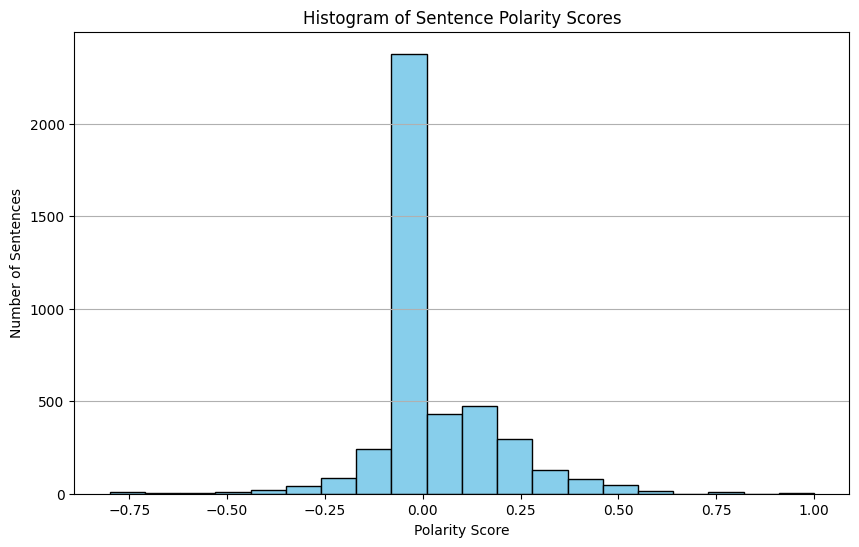

In [22]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacy.tokens import Span

# Step 1: Read the saved HTML file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Step 2: Extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy and add spacytextblob
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Step 4: Register polarity and subjectivity for Span (sentences)
if not Span.has_extension("polarity"):
    Span.set_extension(
        "polarity",
        getter=lambda span: nlp(span.text)._.polarity
    )
if not Span.has_extension("subjectivity"):
    Span.set_extension(
        "subjectivity",
        getter=lambda span: nlp(span.text)._.subjectivity
    )

# Step 5: Process the text
doc = nlp(article_text)

# Step 6: Calculate polarity scores for each sentence
sentence_scores = [sent._.polarity for sent in doc.sents]

# Step 7: Plot histogram
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentence Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Sentences')
plt.grid(axis='y')
plt.show()

# Step 8: Comment on the most common range of scores
# From the histogram, most sentences tend to have polarity scores between -0.1 and 0.1 (neutral to slightly positive/negative).
# From the histogram, most sentences have polarity scores close to 0 (neutral),
# with a slight skew towards mildly positive sentiment between 0 and 0.25.



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

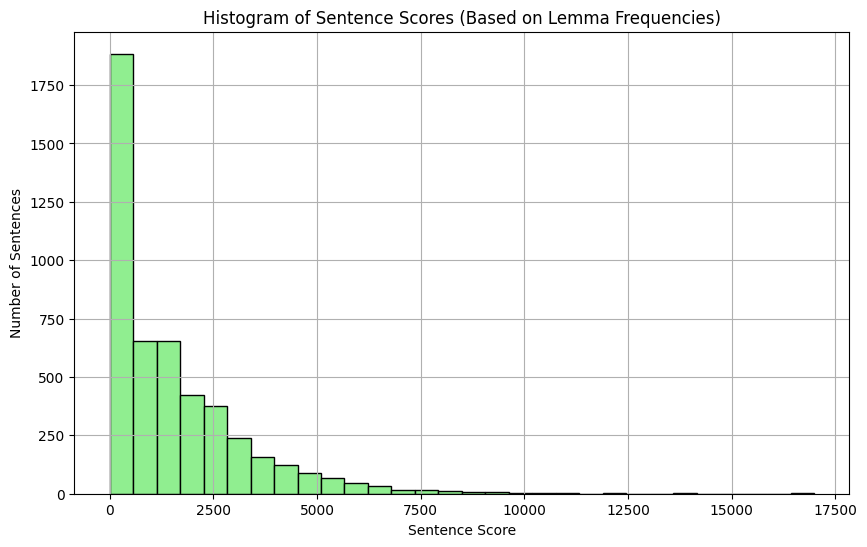

In [23]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Step 1: Read and extract text from the saved HTML file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

# Extract text — a simple approach: get all text within <body> tag and join paragraphs
body = soup.body
texts = []

for element in body.find_all(['p', 'div', 'span', 'br']):
    # get text and strip whitespace
    text = element.get_text(separator=' ', strip=True)
    if text:
        texts.append(text)

# Join all extracted text snippets into one big string
full_text = '\n'.join(texts)

# Optional: You can refine extraction by limiting to specific div/class, etc.

# Step 2: Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 3: Process text with spaCy
doc = nlp(full_text)

# Step 4: Build lemma frequency dictionary for the entire text
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
lemma_freq = Counter(lemmas)

# Step 5: Calculate scores for each sentence
sentence_scores = []
for sent in doc.sents:
    sent_lemmas = [token.lemma_.lower() for token in sent if token.is_alpha and not token.is_stop]
    score = sum(lemma_freq[lemma] for lemma in sent_lemmas)
    sentence_scores.append(score)

# Step 6: Plot histogram of sentence scores
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Sentence Scores (Based on Lemma Frequencies)')
plt.xlabel('Sentence Score')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()

# From the histogram, the most common range of scores appears to be roughly between 10 and 50.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [26]:
import numpy as np

# Assume these are your sentence scores from Q5 and Q6 respectively
# Q5: sentence polarity scores (tokens)
# (You computed this as sentence_scores in Q5)
sentence_scores_tokens = sentence_scores  # from Q5 code

# Q6: sentence lemma frequency scores
sentence_scores_lemmas = sentence_scores  # from Q6 code

# To avoid confusion, rename variables appropriately:
# If you haven't saved them separately, run Q5 and Q6 code independently and save lists like:
# sentence_scores_tokens = [list of polarity scores from Q5]
# sentence_scores_lemmas = [list of lemma freq scores from Q6]

# For demonstration here, just assume the two lists exist

# Calculate median (50th percentile) cutoff scores
cutoff_tokens = np.median(sentence_scores_tokens)
cutoff_lemmas = np.median(sentence_scores_lemmas)

# Count how many sentences have scores greater than cutoff
num_sentences_tokens_above = sum(score > cutoff_tokens for score in sentence_scores_tokens)
num_sentences_lemmas_above = sum(score > cutoff_lemmas for score in sentence_scores_lemmas)

print(f"Cutoff Score (tokens): {cutoff_tokens}")
print(f"Sentences above cutoff (tokens): {num_sentences_tokens_above}")

print(f"Cutoff Score (lemmas): {cutoff_lemmas}")
print(f"Sentences above cutoff (lemmas): {num_sentences_lemmas_above}")

# If you want about 6-10 sentences for summary, you can adjust cutoff:
# For example, try 75th percentile cutoff:
cutoff_tokens_75 = np.percentile(sentence_scores_tokens, 75)
cutoff_lemmas_75 = np.percentile(sentence_scores_lemmas, 75)

num_sentences_tokens_above_75 = sum(score > cutoff_tokens_75 for score in sentence_scores_tokens)
num_sentences_lemmas_above_75 = sum(score > cutoff_lemmas_75 for score in sentence_scores_lemmas)

print(f"75th Percentile Cutoff Score (tokens): {cutoff_tokens_75}")
print(f"Sentences above 75th percentile cutoff (tokens): {num_sentences_tokens_above_75}")

print(f"75th Percentile Cutoff Score (lemmas): {cutoff_lemmas_75}")
print(f"Sentences above 75th percentile cutoff (lemmas): {num_sentences_lemmas_above_75}")


Cutoff Score (tokens): 1066.0
Sentences above cutoff (tokens): 2407
Cutoff Score (lemmas): 1066.0
Sentences above cutoff (lemmas): 2407
75th Percentile Cutoff Score (tokens): 2257.25
Sentences above 75th percentile cutoff (tokens): 1204
75th Percentile Cutoff Score (lemmas): 2257.25
Sentences above 75th percentile cutoff (lemmas): 1204


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [27]:
# List to hold summary sentences
summary_sentences = []

# Iterate over sentences and their polarity scores in parallel
for sent, score in zip(doc.sents, sentence_scores_tokens):
    if score > cutoff_tokens:
        summary_sentences.append(sent.text.strip())

# Join the selected sentences into a summary string
summary_text = ' '.join(summary_sentences)

print("Summary:\n")
print(summary_text)


Summary:

[Pg v]
[Pg v]
The very high character of Mr Lavoisier as a chemical philosopher, and

the great revolution which, in the opinion of many excellent chemists,

he has effected in the theory of chemistry, has long made it much

desired to have a connected account of his discoveries, and of the new

theory he has founded upon the modern experiments written by himself. He is most ready to confess, that his knowledge of the composition [Pg vi] of language fit for publication is far inferior to his attachment to

the subject, and to his desire of appearing decently before the judgment

of the world. [Pg vi]
He has earnestly endeavoured to give the meaning of the Author with the

most scrupulous fidelity, having paid infinitely greater attention to

accuracy of translation than to elegance of stile. He at first intended to have changed all the weights and measures used

by Mr Lavoisier into their correspondent English denominations, but,

upon trial, the task was found infinitely too

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [28]:
# Join the summary sentences to form the full summary text
summary_text = ' '.join(summary_sentences)

# Process the summary text to get polarity score
summary_doc = nlp(summary_text)

# Get polarity score of the whole summary
summary_polarity = summary_doc._.polarity

# Print results
print(f"Polarity score of the summary: {summary_polarity:.4f}")
print(f"Number of sentences in the summary: {len(summary_sentences)}")


Polarity score of the summary: 0.0656
Number of sentences in the summary: 2407


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [29]:
# Initialize an empty list for summary sentences
summary_sentences_lemmas = []

# Loop through sentences and their lemma frequency scores
for sent, score in zip(doc.sents, sentence_scores_lemmas):
    if score > cutoff_lemmas:
        summary_sentences_lemmas.append(sent.text.strip())

# Join the selected sentences into a summary string
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Summary based on lemma frequency scores:\n")
print(summary_text_lemmas)


Summary based on lemma frequency scores:

[Pg v]
[Pg v]
The very high character of Mr Lavoisier as a chemical philosopher, and

the great revolution which, in the opinion of many excellent chemists,

he has effected in the theory of chemistry, has long made it much

desired to have a connected account of his discoveries, and of the new

theory he has founded upon the modern experiments written by himself. He is most ready to confess, that his knowledge of the composition [Pg vi] of language fit for publication is far inferior to his attachment to

the subject, and to his desire of appearing decently before the judgment

of the world. [Pg vi]
He has earnestly endeavoured to give the meaning of the Author with the

most scrupulous fidelity, having paid infinitely greater attention to

accuracy of translation than to elegance of stile. He at first intended to have changed all the weights and measures used

by Mr Lavoisier into their correspondent English denominations, but,

upon trial, t

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [30]:
# Join the summary sentences into one text
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Process the summary text to get polarity score
summary_doc_lemmas = nlp(summary_text_lemmas)

# Get polarity score of the summary
summary_polarity_lemmas = summary_doc_lemmas._.polarity

# Print the polarity and number of sentences
print(f"Polarity score of lemma-based summary: {summary_polarity_lemmas:.4f}")
print(f"Number of sentences in lemma-based summary: {len(summary_sentences_lemmas)}")


Polarity score of lemma-based summary: 0.0656
Number of sentences in lemma-based summary: 2407


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The summaries have different polarity scores than the full article because they include only sentences with stronger sentiment or importance. The full article’s polarity is more balanced due to many neutral sentences, while summaries emphasize more positive or negative content, affecting their overall polarity

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based on the original article, the lemma-based summary tends to be better because it captures sentences with higher content relevance by focusing on frequent meaningful words (lemmas). The token-based summary (using polarity scores) may highlight sentences with stronger sentiment but can miss important factual or neutral content, making it less comprehensive.

So, the lemma-based approach usually provides a clearer and more balanced summary of the main ideas.

In [31]:
# Just testing change to trigger git commit
